In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data =pd.read_csv("cleanedcsv/LC-MS (bile acids)_cleaned.csv", index_col=0)
data.head()

,sex,age,menopause,Cholic Acid,Deoxycholic Acid,Cheno-deoxycholic Acid,Urso-deoxycholic Acid,Taurocheno-deoxycholic Acid,Glycocholic Acid,Glycocheno-deoxycholic Acid,Glycourso-deoxycholic Acid,Glycodeoxy-cholic Acid,platform
0,1,66.368241,0,47.250,2.500,106.25,2.50,178.45,268.00,2367.385,221.60,41.600,LC-MS (bile acids)
1,1,23.644875,0,148.850,688.450,538.85,249.55,235.65,579.35,4037.795,940.04,934.945,LC-MS (bile acids)
2,1,50.986995,0,978.385,1452.765,1045.03,135.05,2.50,192.85,376.250,72.30,209.300,LC-MS (bile acids)
3,1,23.368375,0,112.200,345.850,235.75,90.15,267.40,933.00,3208.205,823.30,734.350,LC-MS (bile acids)
4,1,57.310078,0,307.750,562.700,281.20,47.90,31.25,334.00,582.200,111.25,319.900,LC-MS (bile acids)


In [3]:
droplist = ['menopause','platform']
data = data.drop(droplist, axis=1)
data.head()

,sex,age,Cholic Acid,Deoxycholic Acid,Cheno-deoxycholic Acid,Urso-deoxycholic Acid,Taurocheno-deoxycholic Acid,Glycocholic Acid,Glycocheno-deoxycholic Acid,Glycourso-deoxycholic Acid,Glycodeoxy-cholic Acid
0,1,66.368241,47.250,2.500,106.25,2.50,178.45,268.00,2367.385,221.60,41.600
1,1,23.644875,148.850,688.450,538.85,249.55,235.65,579.35,4037.795,940.04,934.945
2,1,50.986995,978.385,1452.765,1045.03,135.05,2.50,192.85,376.250,72.30,209.300
3,1,23.368375,112.200,345.850,235.75,90.15,267.40,933.00,3208.205,823.30,734.350
4,1,57.310078,307.750,562.700,281.20,47.90,31.25,334.00,582.200,111.25,319.900


In [4]:
X = data.drop('age', axis=1)
y = data['age']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [6]:
model = LinearRegression()

In [7]:
model.fit(X_train, y_train)

LinearRegression()

In [8]:
#prognozy da nowych wartości
y_pred = model.predict(X_test)

In [9]:
# Obliczenie R^2
r2 = r2_score(y_test, y_pred)

print("R^2 score:", r2)

R^2 score: 0.09630739348918027


# SHAPLEY

Tutaj jest shapley dla całego zbioru X, można to zmienić na X_trainn ale to trzeba wszedzie wtedy

In [10]:
import shap

In [11]:
explainer = shap.Explainer(model,X_train)

In [12]:
shap_values = explainer(X_train.values)

In [13]:
expected_value = explainer.expected_value


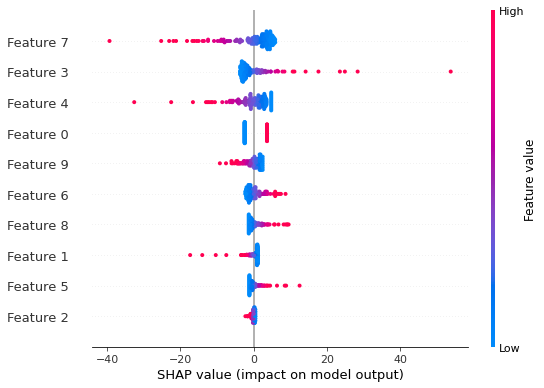

In [14]:
shap.summary_plot(shap_values, X_train)

In [15]:
features = X_train.columns.tolist()
type(features)

list

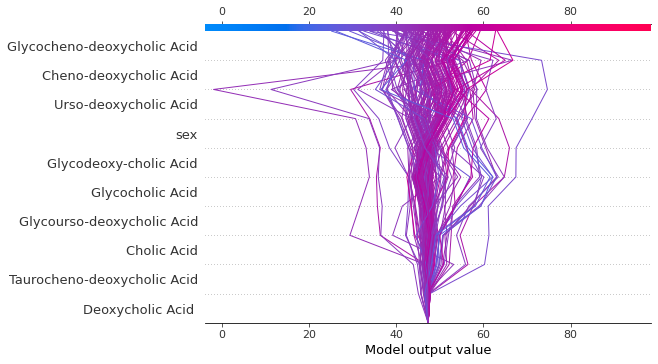

In [16]:
shap.decision_plot(explainer.expected_value, explainer.shap_values(X_train), feature_names=features)

# Najbardziej istotna cecha

Im większa wartośc bezwzględna tym ma większy wpływ

In [27]:
coefficients = model.coef_
intercept = model.intercept_

print("Współczynniki regresji:")
for feature, coefficient in zip(features, coefficients):
    print(f"{feature}: {coefficient}")

print("Intercept:", intercept)

Współczynniki regresji:
sex: 6.084423359446394
Cholic Acid: -0.0027098878326211697
Deoxycholic Acid : -0.001016380761388393
Cheno-deoxycholic Acid: 0.008487755636806784
Urso-deoxycholic Acid: -0.05409951411928349
Taurocheno-deoxycholic Acid: 0.013800280364367081
Glycocholic Acid: 0.008762541343647174
Glycocheno-deoxycholic Acid: -0.006807593862591542
Glycourso-deoxycholic Acid: 0.011594889387478942
Glycodeoxy-cholic Acid: -0.008776792270718883
Intercept: 45.57015517881319
